# Feature engineering
This notebook uses the information about Polish Parliment deputies scraped in the previous notebook and cleans up a database.

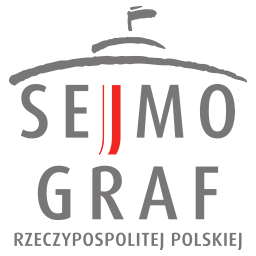


# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
# mount Google Drive on the runtime
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# create a symbolic link to a working directory
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/SEJMograf /mydrive

# navigate to the working directory
%cd /mydrive

ln: failed to create symbolic link '/mydrive/SEJMograf': File exists
/content/gdrive/My Drive/Colab Notebooks/SEJMograf


## Libraries & functions
Let's now install missing libraries and import the necessary libraries and functions we're gonna use in this notebook.

- `requests` - http handling
- `BeautifulSoup` - html parsing & web-scraping
- `urllib.request` - url-opening
- `tqdm.notebook` - loop progress bar for notebooks
- `timeit` - cell runtime check
- `numpy` - linear algebra
- `pandas` - data manipulation & analysis
- `sys` - system-specific parameters & functions
- `os` - operating system interfaces
- `os.path` - pathname manipulation
- `json` - JSON files handling

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

# import nltk
# from nltk import *
# nltk.download('stopwords')
# nltk.download('punkt')
# from nltk.corpus import stopwords
# import spacy


# !pip install ner-d
# from nerd import ner

# import requests
# import bs4
# from bs4 import BeautifulSoup
# import tqdm.notebook as tq
# import timeit


# import time


# Load data

In [4]:
df = pd.read_pickle('df_deputies.pkl')
df.head()

,name,url,picture,election_date,election_list,election_constituency,election_votes,oath_date,service_history,party,birth_date,birth_place,education,schools,occupation,number_of_speeches,interpellations_pursued,interpellations_dismissed,inquiries_pursued,inquiries_dismissed,statements,current_questions,voting_frequency,committees,delegations,groups,offices,coworkers,asset_declarations,benefit_register,emails
0,Adamczyk Andrzej,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,13-10-2019,Prawo i Sprawiedliwość,Kraków,29686,12-11-2019,"poseł V kadencji, poseł VI kadencji, poseł VII...",Klub Parlamentarny Prawo i Sprawiedliwość,04-01-1959,Krzeszowice,wyższe,"Społeczna Akademia Nauk w Łodzi, Wydział Zarzą...",parlamentarzysta,"[6, https://www.sejm.gov.pl/wypowiedzi.xsp?id=...",[],[],[],[],[],[],98.46,[],[],[],"[[*Biuro Poselskie Posła Andrzeja Adamczyka, [...","[[Adam Bielecki, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...",[],Andrzej.Adamczyk@sejm.pl
1,Adamczyk Rafał,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,13-10-2019,Sojusz Lewicy Demokratycznej,Katowice,12148,12-11-2019,brak,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",30-05-1974,Dąbrowa Górnicza,wyższe,"Politechnika Śląska, Organizacja i Zarządzanie...",samorządowiec,"[18, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],[],"[Pytania w sprawach bieżących:, https://www.se...",99.57,"[[Komisja Administracji i Spraw Wewnętrznych,...","[[Polsko-Niderlandzka Grupa Parlamentarna, /SQ...","[[Parlamentarny Zespół Antysmogowy, agent.xsp?...",[[*Biuro Poselskie Posła na Sejm RP Rafała Ada...,"[[Michał Curyło, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Rafal.Adamczyk@sejm.pl
2,Adamowicz Piotr,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,13-10-2019,Koalicja Obywatelska,Gdańsk,41795,12-11-2019,brak,Klub Parlamentarny Koalicja Obywatelska - Plat...,26-06-1961,Elbląg,średnie ogólne,VI LO GdaÅ„sk (1980),dziennikarz,"[13, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],"[Oświadczenia:, https://www.sejm.gov.plinterpe...","[Pytania w sprawach bieżących:, https://www.se...",98.71,"[[Komisja Kultury i Środków Przekazu, agent.x...","[[Grupa Parlamentarna Polska-Republika Korei, ...","[[Parlamentarny Zespół ds. Białorusi, agent.xs...","[[*Biuro Posła na Sejm RP Piotra Adamowicza, [...","[[Zofia Lisicka, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Piotr.Adamowicz@sejm.pl
3,Ajchler Romuald,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,13-10-2019,Sojusz Lewicy Demokratycznej,Piła,14438,12-11-2019,"poseł II kadencji, poseł III kadencji, poseł I...","Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",19-01-1949,Duszniki Wielkopolskie,średnie zawodowe,"PaÅ„stwowe Technikum Rolnicze, Rolnictwo - tec...",rolnik,"[42, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],[],"[Pytania w sprawach bieżących:, https://www.se...",96.54,"[[Komisja Polityki Społecznej i Rodziny, agen...",[],"[[Wielkopolski Zespół Parlamentarny, agent.xsp...",[[*Biuro Poselskie Posła na Sejm Romualda Ajch...,"[[Lidia Nowakowska, Pracownik, https://orka.se...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Romuald.Ajchler@sejm.pl
4,Andruszkiewicz Adam,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.p

## Initiate clean DataFrame

In [5]:
df_clean = pd.DataFrame()

# Clean party data

## Name

In [6]:
df_clean['first_name'] = df['name'].apply(lambda x: x.split(' ')[1])
df_clean['middle_name'] = df['name'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else None)
df_clean['last_name'] = df['name'].apply(lambda x: x.split(' ')[0])
df_clean.head()

,first_name,middle_name,last_name
0,Andrzej,None,Adamczyk
1,Rafał,None,Adamczyk
2,Piotr,None,Adamowicz
3,Romuald,None,Ajchler
4,Adam,None,Andruszkiewicz


## Profile url

In [7]:
df_clean['profile_url'] = df['url'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...


## Picture

In [8]:
df_clean['picture'] = df['picture'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...


## Election date

In [9]:
df_clean['election_date'] = df['election_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13


## Election list

In [10]:
df_clean['election_list'] = df['election_list'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość


## Election constituency

In [11]:
df_clean['election_constituency'] = df['election_constituency'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok


## Election votes

In [12]:
df_clean['election_votes'] = df['election_votes'].apply(lambda x: int(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829


## Oath date

In [13]:
df_clean['oath_date'] = df['oath_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12


## Service history

In [14]:
def historyList(string):
  if string == 'brak':
    return list()
  else:
    return string.split(', ')

df_clean['service_history'] = df['service_history'].apply(lambda x: historyList(x))

def divideHistory(lst):
  sejm = []
  senat = []
  for l in lst:
    if re.search('pos.+', l):
      sejm.append(l)
    elif re.search('sen.+', l):
      senat.append(l)
  return (sejm, senat)

df_clean['sejm_history'] = df_clean['service_history'].apply(lambda x: divideHistory(x)[0])
df_clean['senat_history'] = df_clean['service_history'].apply(lambda x: divideHistory(x)[1])

def extractTerms(lst, term):
  # term = re.compile(f'.+{term}.+')
  for l in lst:
    if re.match(f'.+\s{term}\s.+', l):
      return True
  return False


terms = ['IX', 'X', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII']

for t in terms:
  if t in ['IX', 'X']:
    col_name = f'sejm_prl_term_{t}'
  else: 
    col_name = f'sejm_term_{t}'
  df_clean[col_name] = df_clean['sejm_history'].apply(lambda x: extractTerms(x, t))

for t in terms:
  if t in ['IX', 'X']:
    col_name = f'senat_prl_term_{t}'
  else: 
    col_name = f'senat_term_{t}'
  df_clean[f'senat_term_{t}'] = df_clean['senat_history'].apply(lambda x: extractTerms(x, t))

df_clean['sejm_term_IX'] = True

df_clean.drop(['service_history', 'sejm_history', 'senat_history'], axis=1, inplace=True)

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


## Party

In [15]:
df_clean['club'] = df['party'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S..."
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S..."
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość


# Clean CV data

## Birth date

In [16]:
df_clean['birth_date'] = df['birth_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30


## Birth place

In [17]:
df_clean['birth_place'] = df['birth_place'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo


## Education

In [18]:
df_clean['education'] = df['education'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe


## Schools

### School name

In [19]:
# !pip install wikipedia
# import wikipedia

In [20]:
def schoolName(name):
  split_name = name.split(', ')
  name = str(split_name[0])
  return name

def stripYear(name):  
  return re.sub('\(\d{4}\)', '', name)

def fixChars(name):
  name = name.replace('Å„', 'ń').strip()
  return name

# def checkWiki(name):
#   print(f'Searching for:\n{name}')
#   wikipedia.set_lang('pl')
#   search_results = wikipedia.search(name)
#   print(f'Found:\n{search_results[0]}\nPress enter to accept or type the name manually.')
#   manual = input()
#   if manual == None:
#     return search_results[0]
#   else:
#     return manual


  # try:
  #   page_result = wikipedia.page(name)
  #   title = page_result.title
  #   url = page_result.url
  #   print(f'OK!\nFound the wiki article for {name}:\n{title} @ {url}')
  #   return title

  # except:    
  #   print(f'ERROR\nDidn\'t find any wiki articles for {name}.\nSearching further...')
  #   search_results = wikipedia.search(name)
  #   print(f'Search results for {name}')
  #   for n, r in enumerate(search_results):
  #     print(f'{n+1}: {r}')
  #   print('Please type a number of the result to continue with. If none of them is valid type "0"')
  #   number = int(input())
  #   if number != 0:
  #     choice = search_results[number-1]
  #     print(f'You chose: "{choice}"')
  #     return choice      
  #   else:      
  #     print(f'Please specify the name manually.')
  #     manual = input()
  #     return manual

      
    
    # print('!!!'+name+' ----> '+search_results[0])
  
  # print(f'{name} ---> {search_results[0]}')
  # wiki_wiki = wikipediaapi.Wikipedia('pl')
  # page = wiki_wiki.page(name)
  # if page.exists():
  #   # print(f'{name} ----> {page.title}')
  #   pass
  # else:
  #   print(f'{name} ----> ???')

df_clean['school_name'] = df['schools'].apply(lambda x: schoolName(x))
df_clean['school_name'] = df_clean['school_name'].apply(lambda x: stripYear(x))
df_clean['school_name'] = df_clean['school_name'].apply(lambda x: fixChars(x))
# df_clean['school_name'] = df_clean['school_name'].apply(lambda x: checkWiki(x))

# for name in df_clean['school_name']:
#   print(f'Searching for a school name for:\n{name}')
#   checkWiki(name)
#   print('\n\n')
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school_name
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku


In [30]:
for x in df['schools']:
  splt = x.split(', ')
  print(x+'\n'+str(len(splt))+'\n\n')

Społeczna Akademia Nauk w Łodzi, Wydział Zarządzania, Rachunkowośc i finanse w zarządzaniu - licencjat (2014)
3


Politechnika Śląska, Organizacja i Zarządzanie, Zarządzanie przedsiębiorstwem i marketing przemysłowy - magister inżynier (1999)
3


VI LO GdaÅ„sk (1980)
1


PaÅ„stwowe Technikum Rolnicze, Rolnictwo - technik (1968)
2


Uniwersytet w Białymstoku, Wydział Historyczno-Socjologiczny, Stosunki międzynarodowe - magister (2014)
3


Uniwersytet Śląski w Katowicach, Wydział Nauk Społecznych, Politologia - magister (1996)
3


Akademia Rolnicza w Poznaniu, Wydział Ogrodniczy, Ogrodnictwo - magister inżynier (1987)
3


Akademia Techniczno-Rolnicza w Bydgoszczy, Wydział Rolniczy, Rolnictwo - magister inżynier (1985)
3


Wyższa Szkoła Pedagogiczna, Wydział Humanistyczny, Politologia i nauki społeczne - magister (1999)
3


Uniwersytet Wrocławski, Wydział Prawa i Administracji, Prawo - magister (1984)
3


Wyższa Szkoła Pedagogiczna, Wydział Filologii Polskiej, Filologia polska - magister 

In [28]:
# df_clean[df_clean['school_name'] == 'Liceum Ogólnokształcące im. Adama Mickiewicza w Lubaniu']
df_clean[df_clean['school_name'] == 'Karkonoska Państwowa Szkoła Wyższa w Jeleniej Górze']
# df_clean['school_name'].unique()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school_name,graduation_year
269,Robert,None,Obaz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/23419...,2019-10-13,Sojusz Lewicy Demokratycznej,Legnica,4205,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1973-03-08,Jelenia Góra,wyższe,Karkonoska Państwowa Szkoła Wyższa w Jeleniej ...,2003.0


###Graduation year

In [22]:
def schoolYear(name):
  search = re.search('\d{4}', name)
  if search == None:
    return None
  else:
    return int(search.group(0))

df_clean['graduation_year'] = df['schools'].apply(lambda x: schoolYear(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school_name,graduation_year
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,2014.0
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,1999.0
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,1980.0
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,1968.0
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,2014.0


In [23]:
# !pip install gmaps
# !pip install colab-env -qU

# import colab_env
# import os
# import gmaps
# # https://github.com/pbugnion/gmaps

In [24]:
# import gmaps
# import gmaps.datasets
# key = os.getenv('GMAPS_KEY')
# gmaps.configure(api_key=key) # Your Google API key

# df = gmaps.datasets.load_dataset_as_df('starbucks_kfc_uk')

# starbucks_df = df[df['chain_name'] == 'starbucks']
# starbucks_df = starbucks_df[['latitude', 'longitude']]

# starbucks_layer = gmaps.symbol_layer(
#     starbucks_df, fill_color="green", stroke_color="green", scale=2
# )
# fig = gmaps.figure()
# fig.add_layer(starbucks_layer)
# fig

In [25]:
# container = set()
# for row in df_clean['service_history']:
#   for item in row:
#     container.add(item)
# container

https://spacy.io/models

https://www.nltk.org/api/nltk.html

http://nlp.pwr.wroc.pl/en/

http://plwordnet.pwr.wroc.pl/wordnet/

http://zil.ipipan.waw.pl/LemmaPL

http://morfeusz.sgjp.pl/

https://ichi.pro/pl/cos-z-niczego-uzyj-nlp-i-ml-do-wyodrebniania-i-strukturyzacji-danych-internetowych-69585767705363